# 2. b) Code for the specific modules

In [92]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [93]:
W = np.array([0., 0., 0.])

W_true = np.array([5, 12, 0.07]) # Ground truth: y = 5 + 12*x1 + 0.07*x2

m = 1000
limit = 700

# instead of generating random numbers and normalising start with normalised data
X_train = np.array([np.ones(limit), np.random.randn(limit,), np.random.randn(limit,)])
X_test = np.array([np.ones(m-limit), np.random.randn(m-limit,), np.random.randn(m-limit,)])

Y_train = np.matmul(W_true,X_train)
Y_test = np.matmul(W_true,X_test)

In [68]:
def plot_error(error):
    plt.plot(range(len(error)),error, color="red")
    plt.title("error vs iteration")
    plt.show()

In [69]:
def SGD(w, learning_rate, momentum = 0, epochs=1):
    
    dw = np.zeros(len(w))
    error = []
    sum_dL = np.zeros(len(w))
    
    for epoch in range(epochs):
        for i in range(limit):
            Y_ = np.matmul(W,X_train)
            mse = np.mean((Y_train-Y_)**2)
            error.append(mse)
            dL_dw = np.array([ 2*(Y_train[i] - Y_[i])*x_j[i] for x_j in X_train]) 
            
            # update term
            dw = learning_rate*dL_dw + momentum*dw
            w += dw
            
        plot_error(error)
        return w, error

In [88]:
def Adagrad(w, learning_rate, epochs=1):
    
    dw = np.zeros(len(w))
    error = []
    sum_dL = np.zeros(len(w))
    
    for epoch in range(epochs):
        for i in range(limit):
            Y_ = np.matmul(w,X_train)
            mse = np.mean((Y_train-Y_)**2)
            error.append(mse)
            dL_dw = np.array([ 2*(Y_train[i] - Y_[i])*x_j[i] for x_j in X_train])
            
            # update term
            sum_dL += dL_dw**2
            dw = learning_rate*dL_dw*(sum_dL**-0.5)
            w += dw
            
    plot_error(error)
    return w, error

In [89]:
def RMSprop(w, learning_rate, epochs=1):
    
    dw = np.zeros(len(w))
    error = []
    sum_dL = np.zeros(len(w))
    
    for epoch in range(epochs):
        for i in range(limit):
            Y_ = np.matmul(w,X_train)
            mse = np.mean((Y_train-Y_)**2)
            error.append(mse)
            dL_dw = np.array([ 2*(Y_train[i] - Y_[i])*x_j[i] for x_j in X_train])
            
            # update term
            sum_dL = 0.9*sum_dL + 0.1*dL_dw**2
            dw = learning_rate*dL_dw*(sum_dL**-0.5)
            w += dw
            
    plot_error(error)
    return w, error

# 2. c) Plot for convergence of the loss function with number of iterations

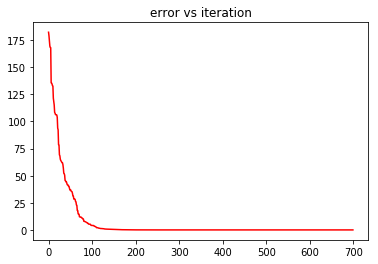

In [55]:
w_sgd_plain, error_sgd_plain = SGD(W,0.01)

In [57]:
Y_ = np.matmul(w_sgd_plain,X_test)
mse = np.mean((Y_test-Y_)**2)
print("test_error : "+str(mse))

test_error : 8.2359623006e-12


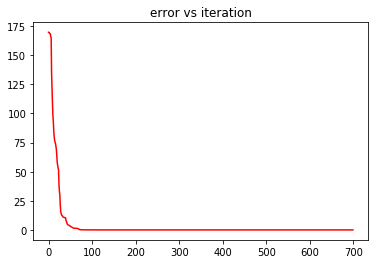

In [60]:
w_sgd, error_sgd = SGD(W,0.01,0.5)

In [61]:
Y_ = np.matmul(w_sgd,X_test)
mse = np.mean((Y_test-Y_)**2)
print("test_error : "+str(mse))

test_error : 6.31907302521e-25


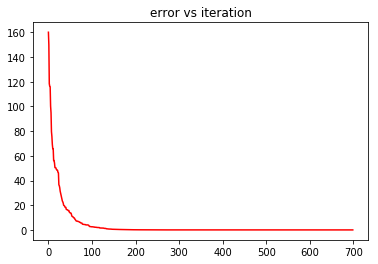

In [90]:
w_ada, error_ada = Adagrad(W,1)

In [91]:
Y_ = np.matmul(w_ada,X_test)
mse = np.mean((Y_test-Y_)**2)
print("test_error : "+str(mse))

test_error : 2.45981872048e-08


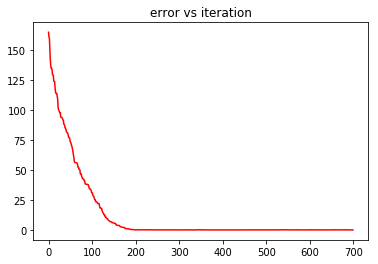

In [94]:
w_rms, error_rms = RMSprop(W,0.1)

In [95]:
Y_ = np.matmul(w_rms,X_test)
mse = np.mean((Y_test-Y_)**2)
print("test_error : "+str(mse))

test_error : 0.000206887032254
